In [5]:
import pandas as pd
import seaborn as sns

data = pd.read_csv('penguins.csv')

In [6]:
datas = data[[
    "Species", "Island", "Clutch_Completion",
    "Culmen_Length_mm", "Culmen_Depth_mm",
    "Flipper_Length_mm", "Body_Mass_g", "Sex"
]]

print("Null values check:\n", datas.isnull())
datas = datas.dropna()
print("\nRemaining nulls per column:\n", datas.isnull().sum())


Null values check:
      Species  Island  Clutch_Completion  Culmen_Length_mm  Culmen_Depth_mm  \
0      False   False              False             False            False   
1      False   False              False             False            False   
2      False   False              False             False            False   
3      False   False              False              True             True   
4      False   False              False             False            False   
..       ...     ...                ...               ...              ...   
339    False   False              False              True             True   
340    False   False              False             False            False   
341    False   False              False             False            False   
342    False   False              False             False            False   
343    False   False              False             False            False   

     Flipper_Length_mm  Body_Mass_g    Sex 

In [12]:
print("\nRemaining nulls per column:\n", datas.isnull().sum())


Remaining nulls per column:
 Species              0
Island               0
Clutch_Completion    0
Culmen_Length_mm     0
Culmen_Depth_mm      0
Flipper_Length_mm    0
Body_Mass_g          0
Sex                  0
dtype: int64


In [10]:
print("\nDataset Info:")
print(datas.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species            334 non-null    object 
 1   Island             334 non-null    object 
 2   Clutch_Completion  334 non-null    object 
 3   Culmen_Length_mm   334 non-null    float64
 4   Culmen_Depth_mm    334 non-null    float64
 5   Flipper_Length_mm  334 non-null    float64
 6   Body_Mass_g        334 non-null    float64
 7   Sex                334 non-null    object 
dtypes: float64(4), object(4)
memory usage: 23.5+ KB
None


In [11]:
print("\nSex value counts:")
print(datas['Sex'].value_counts())


Sex value counts:
Sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64


In [7]:
datas.drop(datas.index[datas['Sex'] == '.'], axis=0, inplace=True)
datas['Sex'].value_counts()

Sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [8]:
X = datas.drop("Sex", axis=1)
y = datas["Sex"]

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
sp=X['Species']
sple=le.fit_transform(X['Species'])
sple

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [13]:
objs = X.select_dtypes(include="object").columns
print(objs)
for i in objs:
    X[i] = le.fit_transform(X[i])
X

Index(['Species', 'Island', 'Clutch_Completion'], dtype='object')


,Species,Island,Clutch_Completion,Culmen_Length_mm,Culmen_Depth_mm,Flipper_Length_mm,Body_Mass_g
0,0,2,1,39.1,18.7,181.0,3750.0
1,0,2,1,39.5,17.4,186.0,3800.0
2,0,2,1,40.3,18.0,195.0,3250.0
4,0,2,1,36.7,19.3,193.0,3450.0
5,0,2,1,39.3,20.6,190.0,3650.0
...,...,...,...,...,...,...,...
338,2,0,0,47.2,13.7,214.0,4925.0
340,2,0,1,46.8,14.3,215.0,4850.0
341,2,0,1,50.4,15.7,222.0,5750.0
342,2,0,1,45.2,14.8,212.0,5200.0


In [14]:
from sklearn.model_selection import train_test_split
# X and y are defined in cell 6, so make sure to run cell 6 before this cell
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

In [30]:
from sklearn.tree import DecisionTreeClassifier
dte = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=5)
dte = dte.fit(X_train, y_train)
dte_pred = dte.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:\n", confusion_matrix(y_test, dte_pred))
print("\nClassification Report:\n", classification_report(y_test, dte_pred))
print("\nAccuracy:", accuracy_score(y_test, dte_pred))


Confusion Matrix:
 [[33  4]
 [ 3 27]]

Classification Report:
               precision    recall  f1-score   support

      FEMALE       0.92      0.89      0.90        37
        MALE       0.87      0.90      0.89        30

    accuracy                           0.90        67
   macro avg       0.89      0.90      0.89        67
weighted avg       0.90      0.90      0.90        67


Accuracy: 0.8955223880597015


In [ ]:
# dte2=DecisionTreeClassifier(criterion='gini')
# dte2=dte2.fit(X_train,y_train)
# dte2_pred=dte2.predict(X_test)
# print("Confusion Matrix:\n", confusion_matrix(y_test, dte2_pred))
# print("\nClassification Report:\n", classification_report(y_test, dte2_pred))
# print("\nAccuracy:", accuracy_score(y_test, dte2_pred))

Confusion Matrix:
 [[32  5]
 [ 5 25]]

Classification Report:
               precision    recall  f1-score   support

      FEMALE       0.86      0.86      0.86        37
        MALE       0.83      0.83      0.83        30

    accuracy                           0.85        67
   macro avg       0.85      0.85      0.85        67
weighted avg       0.85      0.85      0.85        67


Accuracy: 0.8507462686567164


[Text(0.5375, 0.9, 'Body_Mass_g <= 3712.5\nentropy = 0.999\nsamples = 266\nvalue = [128, 138]\nclass = MALE'),
 Text(0.275, 0.7, 'Culmen_Depth_mm <= 18.55\nentropy = 0.699\nsamples = 90\nvalue = [73, 17]\nclass = FEMALE'),
 Text(0.40625, 0.8, 'True  '),
 Text(0.1, 0.5, 'Culmen_Length_mm <= 40.55\nentropy = 0.198\nsamples = 65\nvalue = [63, 2]\nclass = FEMALE'),
 Text(0.05, 0.3, 'entropy = 0.0\nsamples = 41\nvalue = [41, 0]\nclass = FEMALE'),
 Text(0.15, 0.3, 'Culmen_Length_mm <= 40.75\nentropy = 0.414\nsamples = 24\nvalue = [22, 2]\nclass = FEMALE'),
 Text(0.1, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = MALE'),
 Text(0.2, 0.1, 'entropy = 0.258\nsamples = 23\nvalue = [22, 1]\nclass = FEMALE'),
 Text(0.45, 0.5, 'Culmen_Length_mm <= 38.95\nentropy = 0.971\nsamples = 25\nvalue = [10, 15]\nclass = MALE'),
 Text(0.35, 0.3, 'Culmen_Depth_mm <= 19.4\nentropy = 0.544\nsamples = 8\nvalue = [7, 1]\nclass = FEMALE'),
 Text(0.3, 0.1, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]\nclass

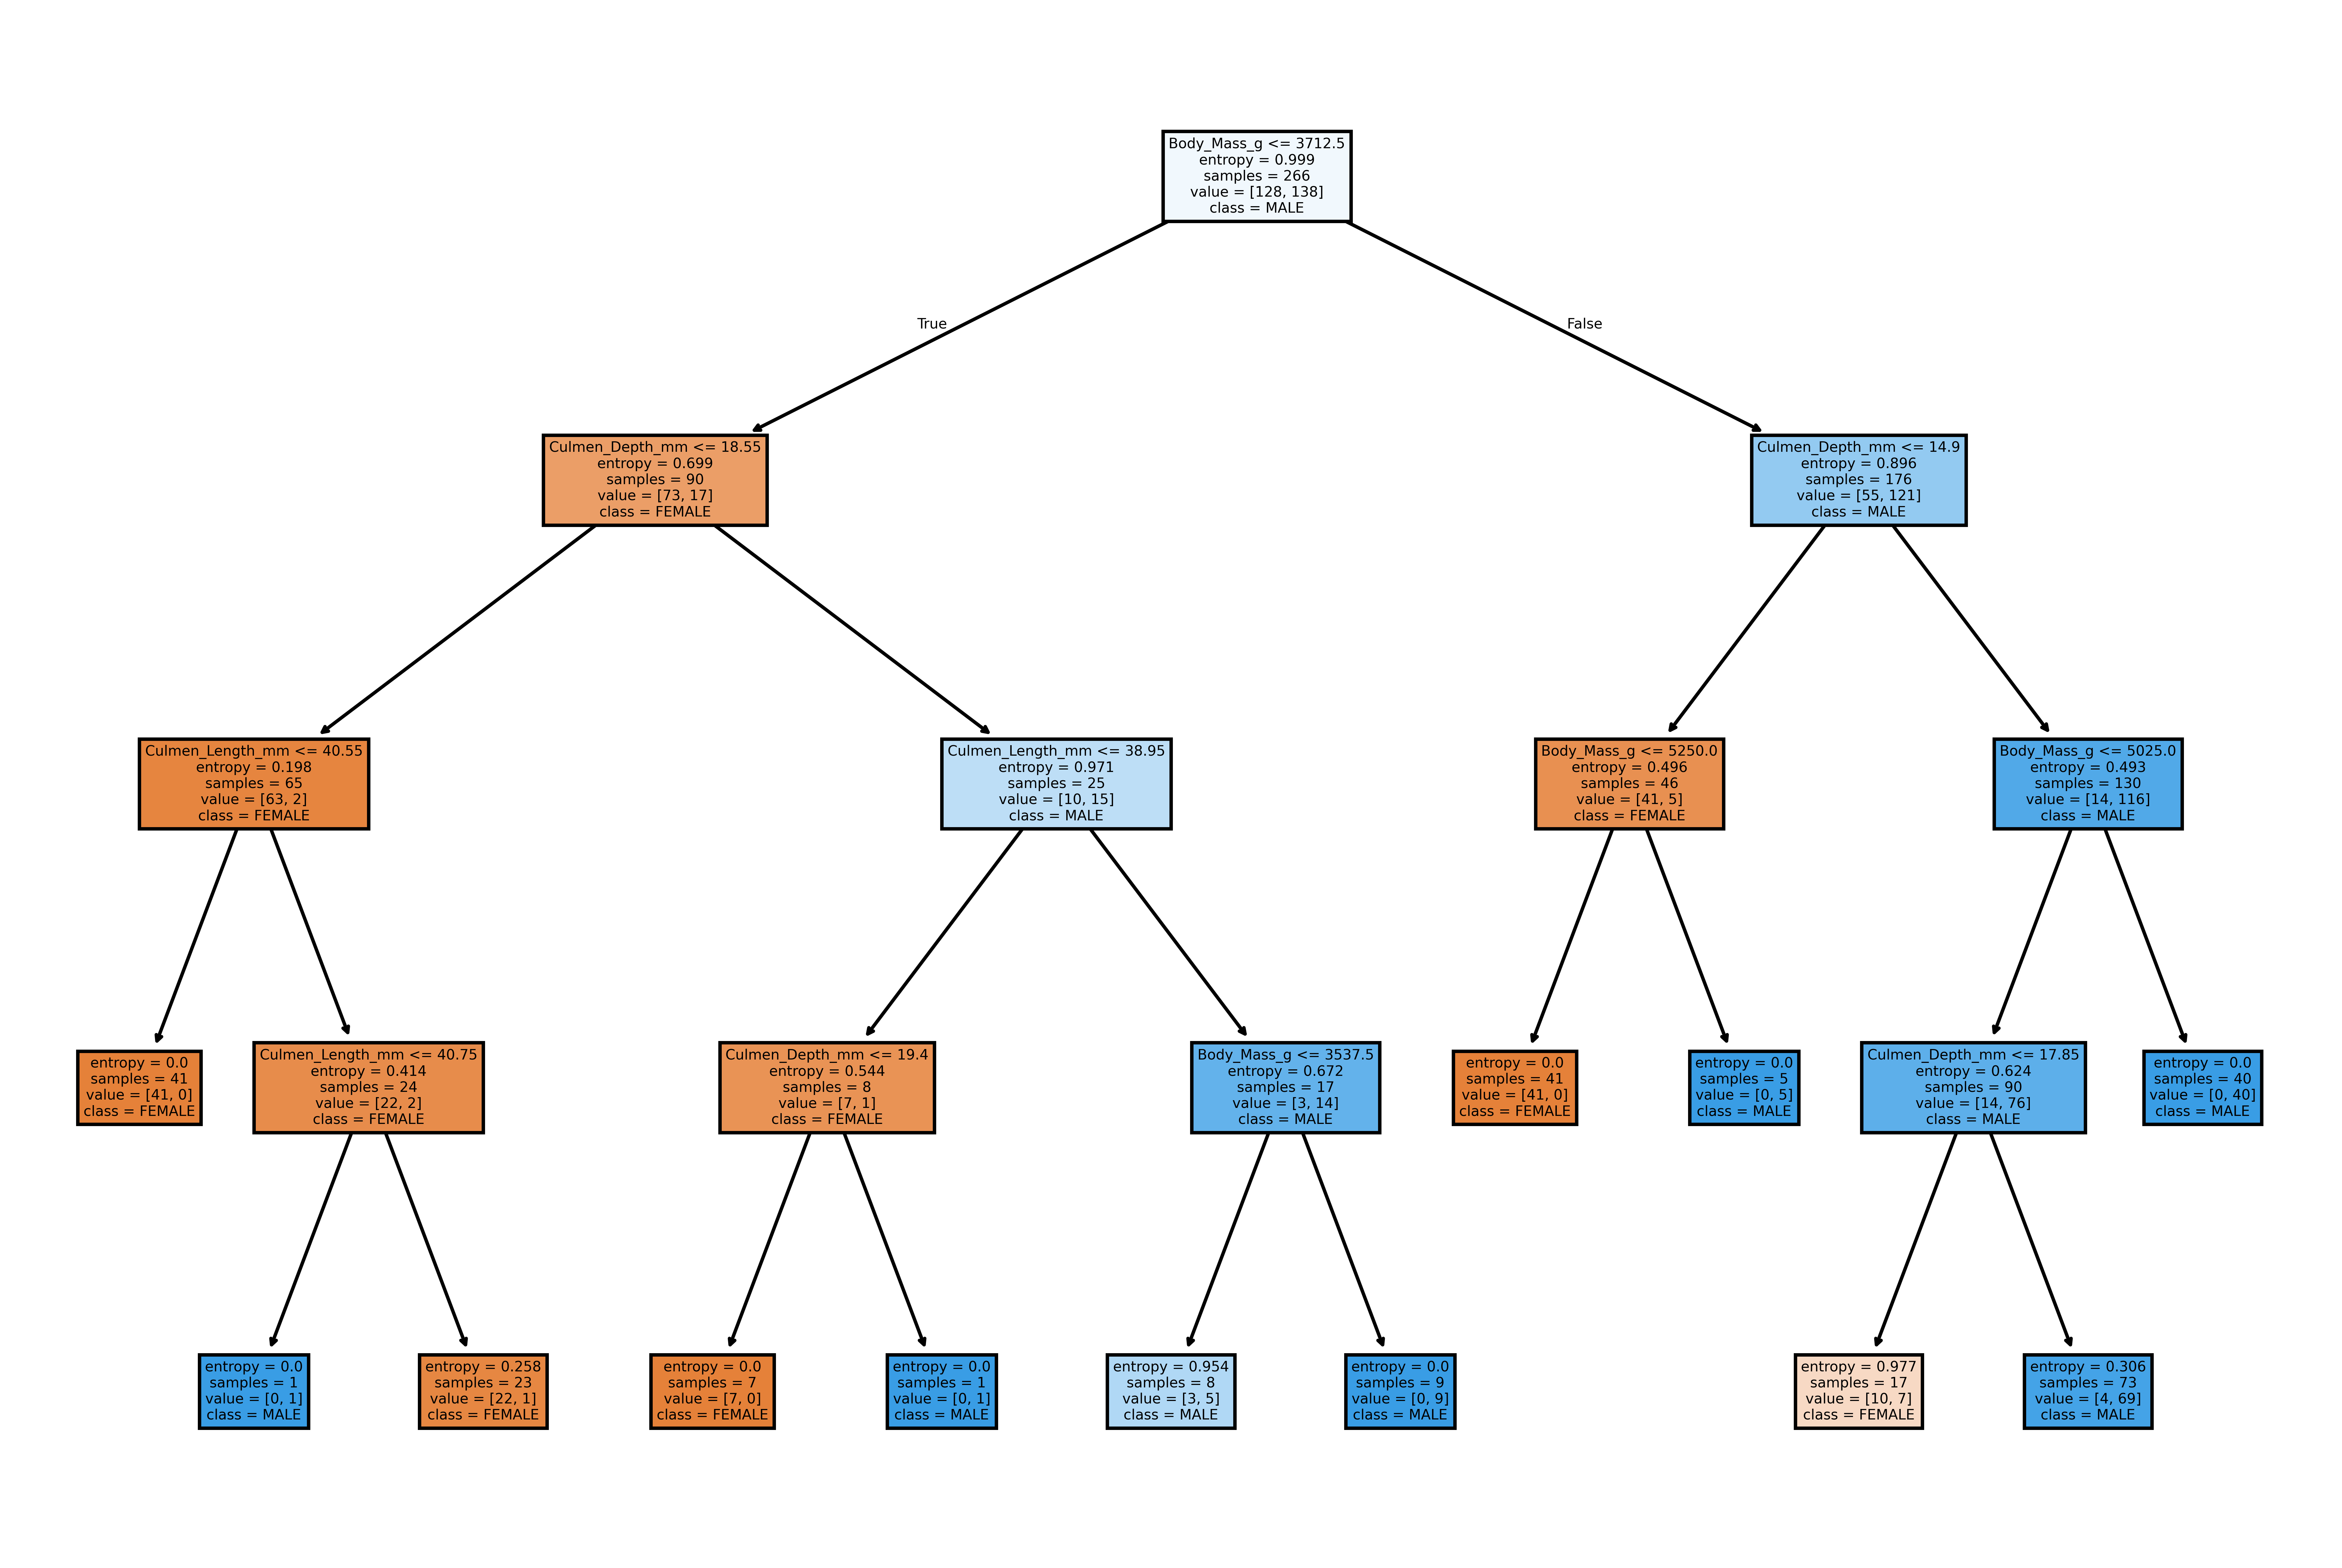

In [32]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(12,8), dpi=800)
tree.plot_tree(dte, filled=True, feature_names=X.columns, class_names=dte.classes_)

In [20]:
from pandas import get_dummies


pd.get_dummies(datas.Species)
d1=get_dummies(datas.Species, dtype=int)
pd.get_dummies(datas.Island)
d2=get_dummies(datas.Island, dtype=int)
pd.get_dummies(datas.Clutch_Completion)
d3=get_dummies(datas.Clutch_Completion, dtype=int)
d1

,Adelie Penguin (Pygoscelis adeliae),Chinstrap penguin (Pygoscelis antarctica),Gentoo penguin (Pygoscelis papua)
0,1,0,0
1,1,0,0
2,1,0,0
4,1,0,0
5,1,0,0
...,...,...,...
338,0,0,1
340,0,0,1
341,0,0,1
342,0,0,1


In [21]:
d2

,Biscoe,Dream,Torgersen
0,0,0,1
1,0,0,1
2,0,0,1
4,0,0,1
5,0,0,1
...,...,...,...
338,1,0,0
340,1,0,0
341,1,0,0
342,1,0,0


In [22]:
d3

,No,Yes
0,0,1
1,0,1
2,0,1
4,0,1
5,0,1
...,...,...
338,1,0
340,0,1
341,0,1
342,0,1


In [23]:
pingu=pd.concat([X, d1, d2, d3], axis='columns')
pingu=pingu.drop(['Species', 'Island' , 'Clutch_Completion'], axis=1)
pingu

,Culmen_Length_mm,Culmen_Depth_mm,Flipper_Length_mm,Body_Mass_g,Adelie Penguin (Pygoscelis adeliae),Chinstrap penguin (Pygoscelis antarctica),Gentoo penguin (Pygoscelis papua),Biscoe,Dream,Torgersen,No,Yes
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,0,1
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,0,1
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,0,1
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,1,1,0,0,1,0
340,46.8,14.3,215.0,4850.0,0,0,1,1,0,0,0,1
341,50.4,15.7,222.0,5750.0,0,0,1,1,0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,1,1,0,0,0,1


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

In [27]:
from sklearn.tree import DecisionTreeClassifier
dte1=DecisionTreeClassifier(criterion='entropy')
dte1=dte1.fit(X_train,y_train)
dte_pred1=dte1.predict(X_test)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:\n", confusion_matrix(y_test, dte_pred1))
print("\nClassification Report:\n", classification_report(y_test, dte_pred1))
print("\nAccuracy:", accuracy_score(y_test, dte_pred1))

Confusion Matrix:
 [[33  4]
 [ 7 23]]

Classification Report:
               precision    recall  f1-score   support

      FEMALE       0.82      0.89      0.86        37
        MALE       0.85      0.77      0.81        30

    accuracy                           0.84        67
   macro avg       0.84      0.83      0.83        67
weighted avg       0.84      0.84      0.83        67


Accuracy: 0.835820895522388


[Text(0.4479166666666667, 0.95, 'Body_Mass_g <= 3712.5\nentropy = 0.999\nsamples = 266\nvalue = [128, 138]\nclass = MALE'),
 Text(0.22916666666666666, 0.85, 'Culmen_Depth_mm <= 18.55\nentropy = 0.699\nsamples = 90\nvalue = [73, 17]\nclass = FEMALE'),
 Text(0.3385416666666667, 0.8999999999999999, 'True  '),
 Text(0.08333333333333333, 0.75, 'Culmen_Length_mm <= 40.55\nentropy = 0.198\nsamples = 65\nvalue = [63, 2]\nclass = FEMALE'),
 Text(0.041666666666666664, 0.65, 'entropy = 0.0\nsamples = 41\nvalue = [41, 0]\nclass = FEMALE'),
 Text(0.125, 0.65, 'Culmen_Length_mm <= 40.75\nentropy = 0.414\nsamples = 24\nvalue = [22, 2]\nclass = FEMALE'),
 Text(0.08333333333333333, 0.55, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = MALE'),
 Text(0.16666666666666666, 0.55, 'Culmen_Length_mm <= 48.3\nentropy = 0.258\nsamples = 23\nvalue = [22, 1]\nclass = FEMALE'),
 Text(0.125, 0.45, 'entropy = 0.0\nsamples = 20\nvalue = [20, 0]\nclass = FEMALE'),
 Text(0.20833333333333334, 0.45, 'Culmen_Depth_mm

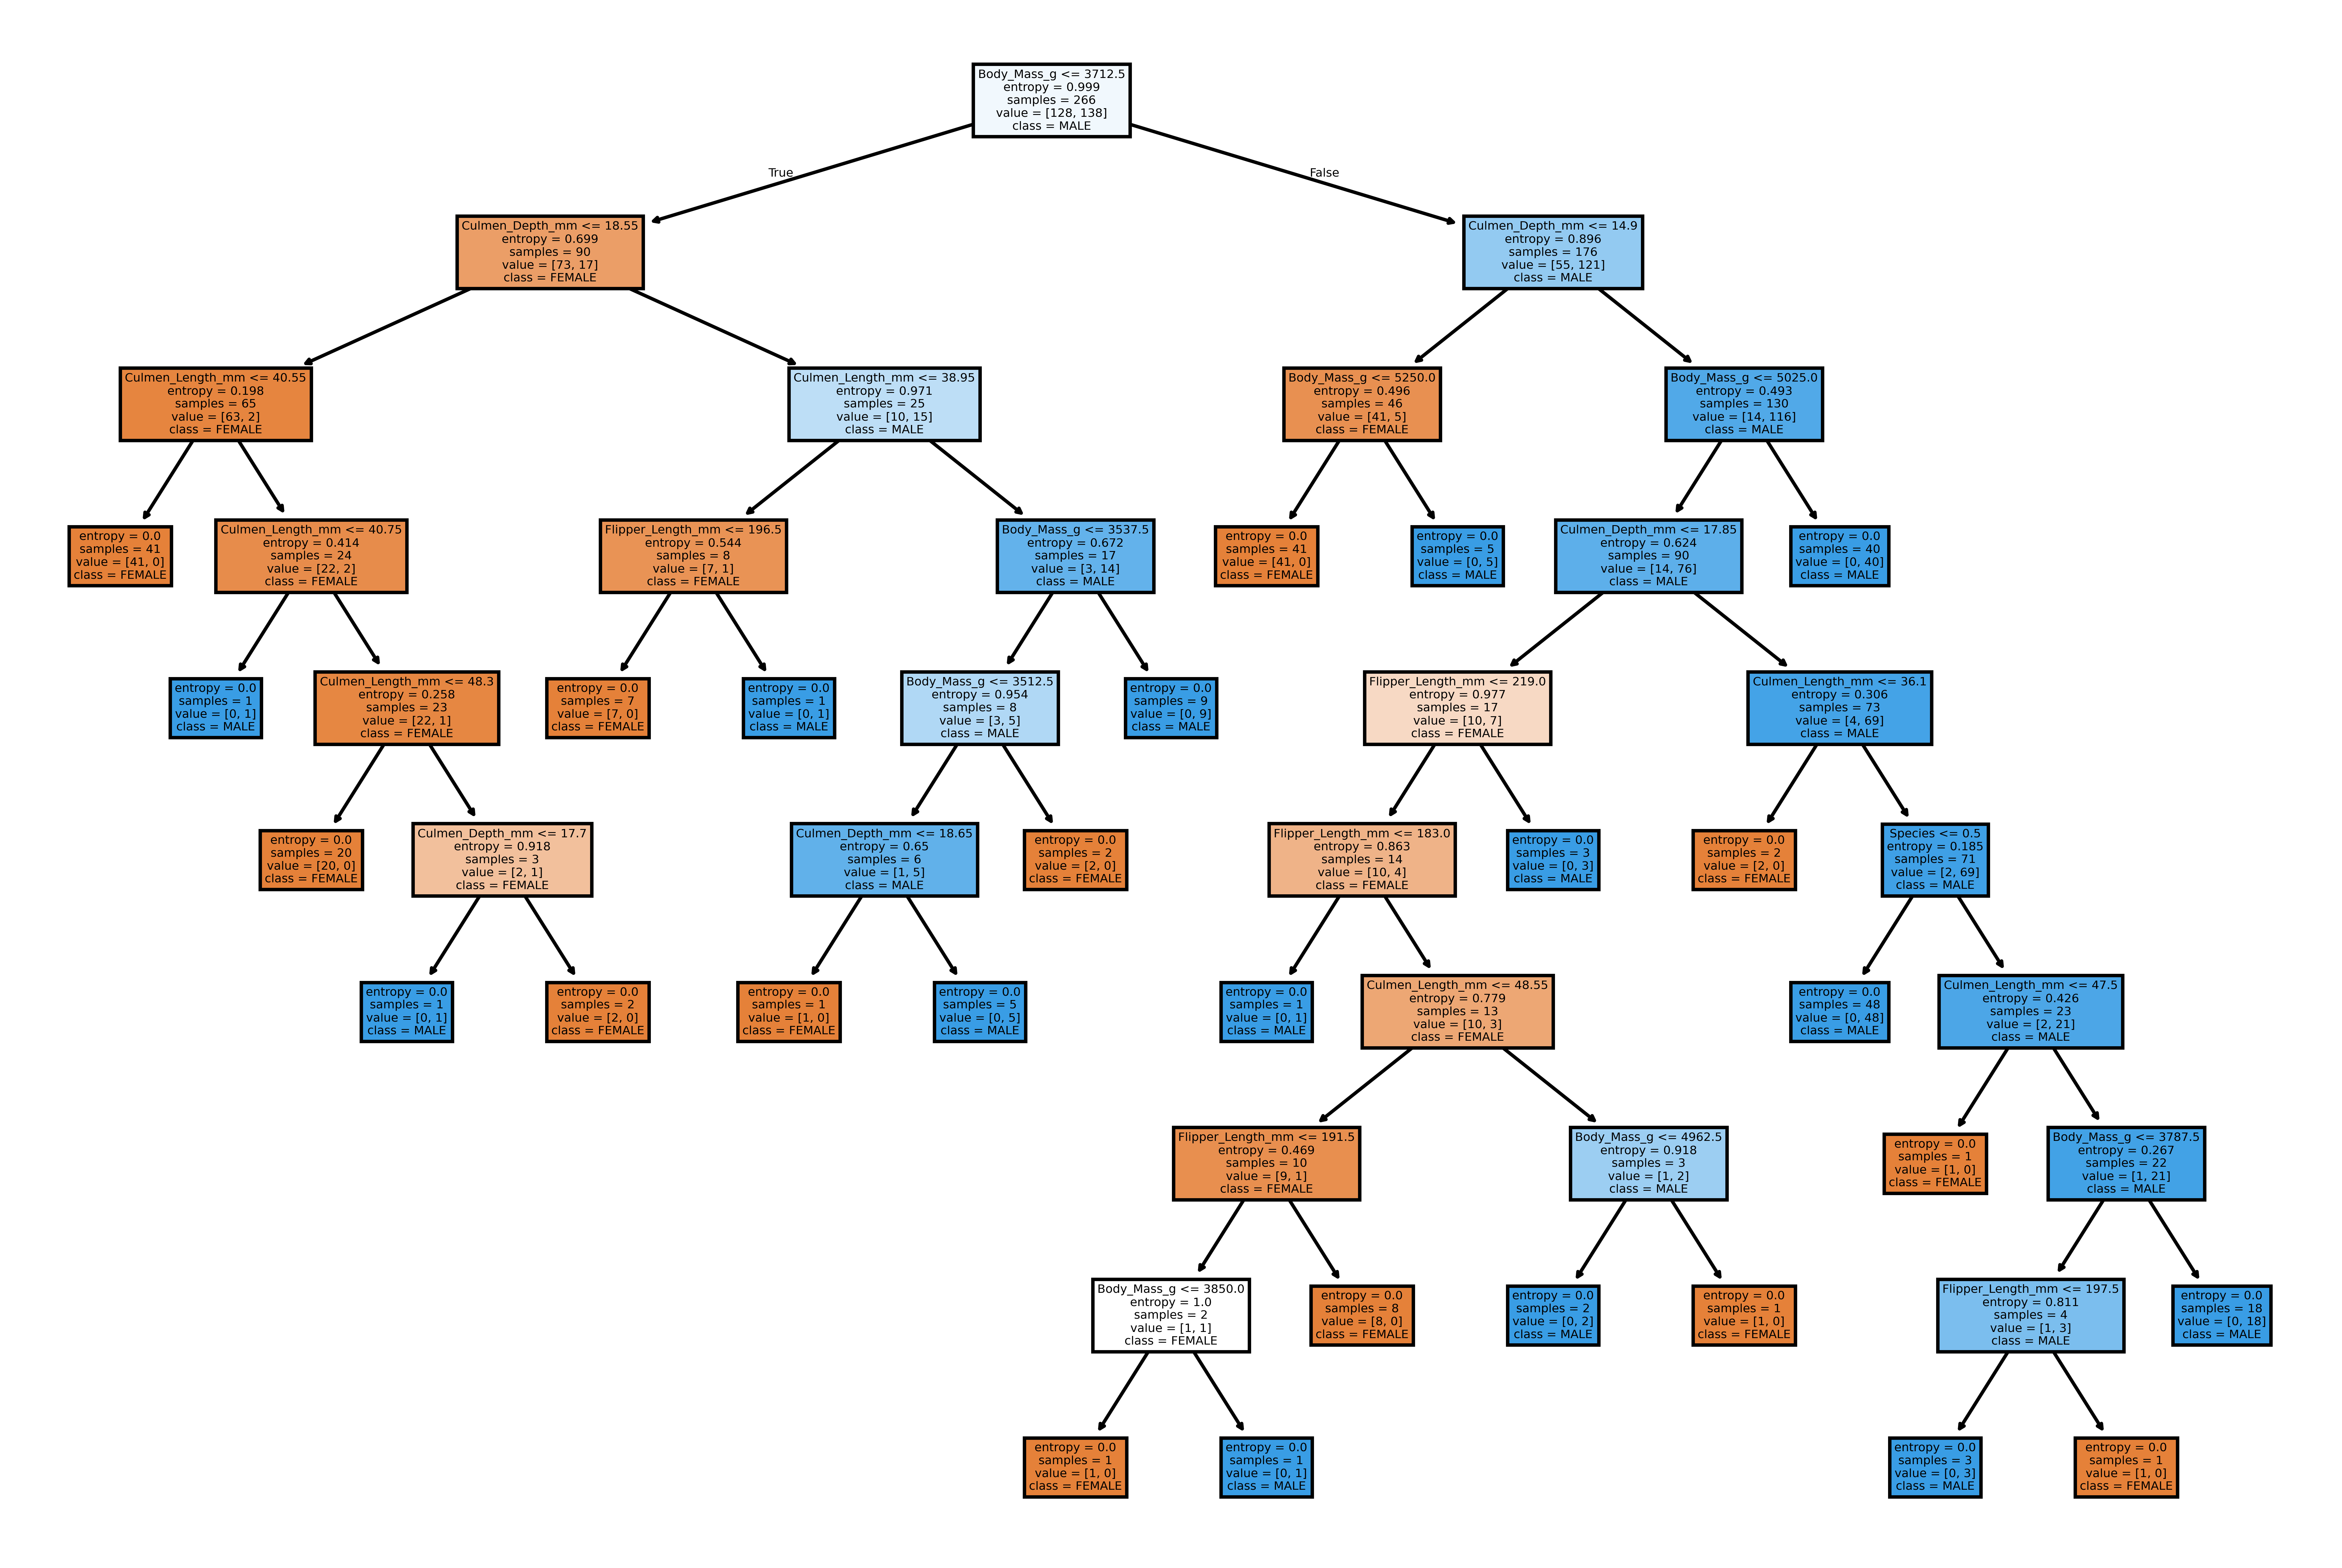

In [29]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(12,8), dpi=800)
tree.plot_tree(dte, filled=True, feature_names=X.columns, class_names=dte1.classes_)